In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Ensure that NLTK's resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/biraa@sphnet.com.sg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/biraa@sphnet.com.sg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
file_path = "./data/social_media.csv"
df = pd.read_csv(file_path)

print(f"Loaded the {file_path}")

Loaded the ./data/social_media.csv


In [6]:
df.shape

(4944, 4)

# Data Cleaning

In [7]:
import contractions
import emoji

def clean_text(text):
    """
    Function to clean text by removing special characters, numbers, and extra spaces,
    converting text to lowercase, and standardizing the text.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove user handles
    text = re.sub(r'@\w+', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def remove_stopwords(text):
    """
    Function to remove English stopwords from a string.
    """
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

def stem_text(text):
    """
    Function to stem words in a string.
    """
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def filter_short_texts(text):
    """
    Function to filter out texts that are less than 25 characters.
    """
    return text if len(text) >= 25 else ''


def expand_contractions(text):
    return contractions.fix(text)


def clean_emoji(text):
    return emoji.demojize(text)


# Applying the functions to a DataFrame
def preprocess_dataframe(df, text_column):
    """
    Applies text preprocessing functions to a DataFrame and retains the original text.
    """
    # Create a new column for the cleaned text
    df['cleaned_text'] = df[text_column]

    # Apply cleaning functions to the new 'cleaned_text' column
    df['cleaned_text'] = df['cleaned_text'].apply(expand_contractions)
    df['cleaned_text'] = df['cleaned_text'].apply(clean_text)
    df['cleaned_text'] = df['cleaned_text'].apply(filter_short_texts)
    df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
    df['cleaned_text'] = df['cleaned_text'].apply(stem_text)
    df['cleaned_text'] = df['cleaned_text'].apply(clean_emoji)  # Assuming you have a function clean_emoji defined

    # Optionally, remove rows where 'cleaned_text' is empty after processing
    df = df[df['cleaned_text'] != '']
    return df


In [8]:
cleaned_df = preprocess_dataframe(df, 'text')
cleaned_df

,text,author,score,datetime,cleaned_text
0,You sure about that ? You said you are in Nova...,bobjr94,169,2024-01-14T04:36:08Z,sure said nova scotia ampl kw chademo fast cha...
1,I must have been using a crappy search setting...,MchKitty,149,2024-01-14T04:40:06Z,must use crappi search set see charger look thank
2,"Use the Chargehub app, and set your filter to ...",jddbeyondthesky,39,2024-01-14T13:04:33Z,use chargehub app set filter show chademo
3,"Some apps have filters, so you have to adjust ...",Altruistic_Profile96,4,2024-01-14T15:11:48Z,app filter adjust find chademo unit said would...
4,So do you regret the new Nissan Leaf? Or do yo...,BranchLatter4294,-93,2024-01-14T05:27:18Z,regret new nissan leaf regret use correct filt...
...,...,...,...,...,...
4939,The fastest i have ever clicked! Love the work!,@takudzwamaunganidze9480,0,2024-04-10T10:06:13Z,fastest ever click love work
4940,Yes boss… carwow all the way!!!!,@bakeyjoe,0,2024-04-10T10:06:12Z,ye boss carwow way
4941,Now one has watched the full video yet except ...,@RealWaffleTech0,2,2024-04-10T10:06:05Z,one watch full video yet except editor whoever...
4942,Buying an EV is a mistake in the first place.,@xTH3xMoDsZx,176,2024-04-10T10:05:52Z,buy ev mistak first place


In [9]:
cleaned_df[['text', 'cleaned_text']]

,text,cleaned_text
0,You sure about that ? You said you are in Nova...,sure said nova scotia ampl kw chademo fast cha...
1,I must have been using a crappy search setting...,must use crappi search set see charger look thank
2,"Use the Chargehub app, and set your filter to ...",use chargehub app set filter show chademo
3,"Some apps have filters, so you have to adjust ...",app filter adjust find chademo unit said would...
4,So do you regret the new Nissan Leaf? Or do yo...,regret new nissan leaf regret use correct filt...
...,...,...
4939,The fastest i have ever clicked! Love the work!,fastest ever click love work
4940,Yes boss… carwow all the way!!!!,ye boss carwow way
4941,Now one has watched the full video yet except ...,one watch full video yet except editor whoever...
4942,Buying an EV is a mistake in the first place.,buy ev mistak first place


In [10]:
# Calculate word count
cleaned_df['word_count'] = cleaned_df['cleaned_text'].apply(lambda x: len(x.split()))

# Calculate character count
cleaned_df['char_count'] = cleaned_df['cleaned_text'].apply(len)

# Display the first few rows to check the new columns
(cleaned_df[['cleaned_text', 'word_count', 'char_count']].head())


,cleaned_text,word_count,char_count
0,sure said nova scotia ampl kw chademo fast cha...,38,209
1,must use crappi search set see charger look thank,9,49
2,use chargehub app set filter show chademo,7,41
3,app filter adjust find chademo unit said would...,14,76
4,regret new nissan leaf regret use correct filt...,14,86


In [11]:
# Display the first few rows to verify
cleaned_df.head()

,text,author,score,datetime,cleaned_text,word_count,char_count
0,You sure about that ? You said you are in Nova...,bobjr94,169,2024-01-14T04:36:08Z,sure said nova scotia ampl kw chademo fast cha...,38,209
1,I must have been using a crappy search setting...,MchKitty,149,2024-01-14T04:40:06Z,must use crappi search set see charger look thank,9,49
2,"Use the Chargehub app, and set your filter to ...",jddbeyondthesky,39,2024-01-14T13:04:33Z,use chargehub app set filter show chademo,7,41
3,"Some apps have filters, so you have to adjust ...",Altruistic_Profile96,4,2024-01-14T15:11:48Z,app filter adjust find chademo unit said would...,14,76
4,So do you regret the new Nissan Leaf? Or do yo...,BranchLatter4294,-93,2024-01-14T05:27:18Z,regret new nissan leaf regret use correct filt...,14,86


## Frequency Analysis

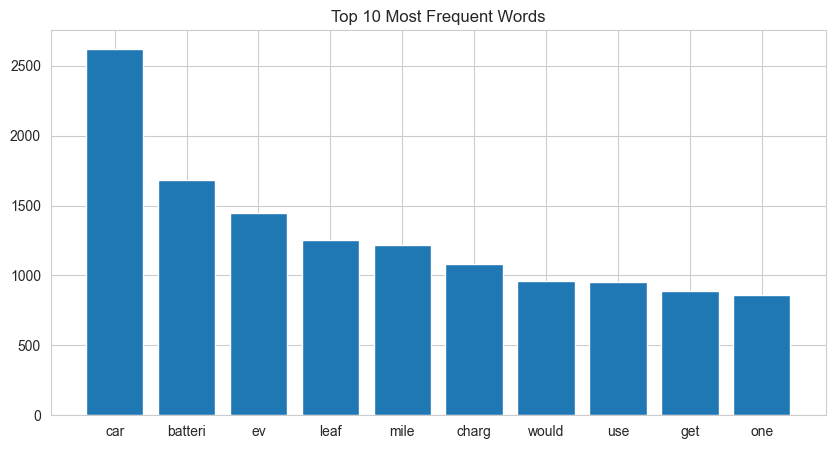

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize words across all posts
words = [word for sublist in cleaned_df['cleaned_text'].apply(lambda x: x.split()) for word in sublist]
word_freq = Counter(words)

# Most common words
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.show()


# Word Cloud

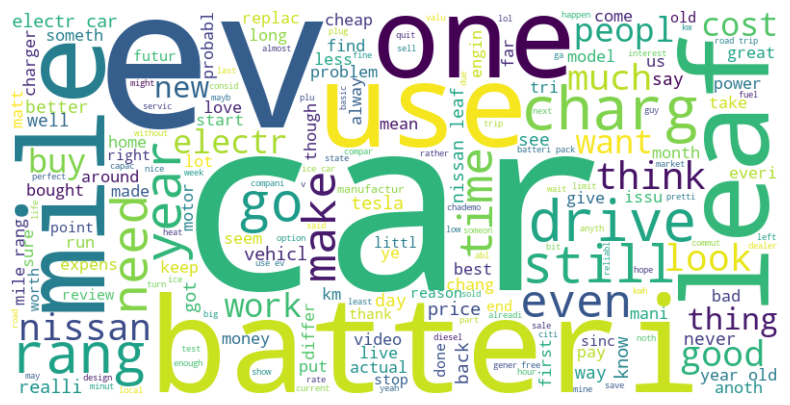

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the cleaned text data into a single string
text = " ".join(review for review in cleaned_df['cleaned_text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Time Series Plot

In [14]:
# Convert 'datetime' column to datetime type directly
cleaned_df['datetime'] = pd.to_datetime(cleaned_df['datetime'])

# Confirm the datatype
print(cleaned_df['datetime'].dtype)

datetime64[ns, UTC]


In [88]:
# Group by date and count the number of comments each day
daily_comments = cleaned_df.groupby(cleaned_df['datetime'].dt.date).size()

# Display the first few rows of the aggregation to verify
daily_comments.head()


datetime
2015-03-21    144
2015-03-22     98
2015-03-23      9
2015-03-24      1
2015-03-25      1
dtype: int64

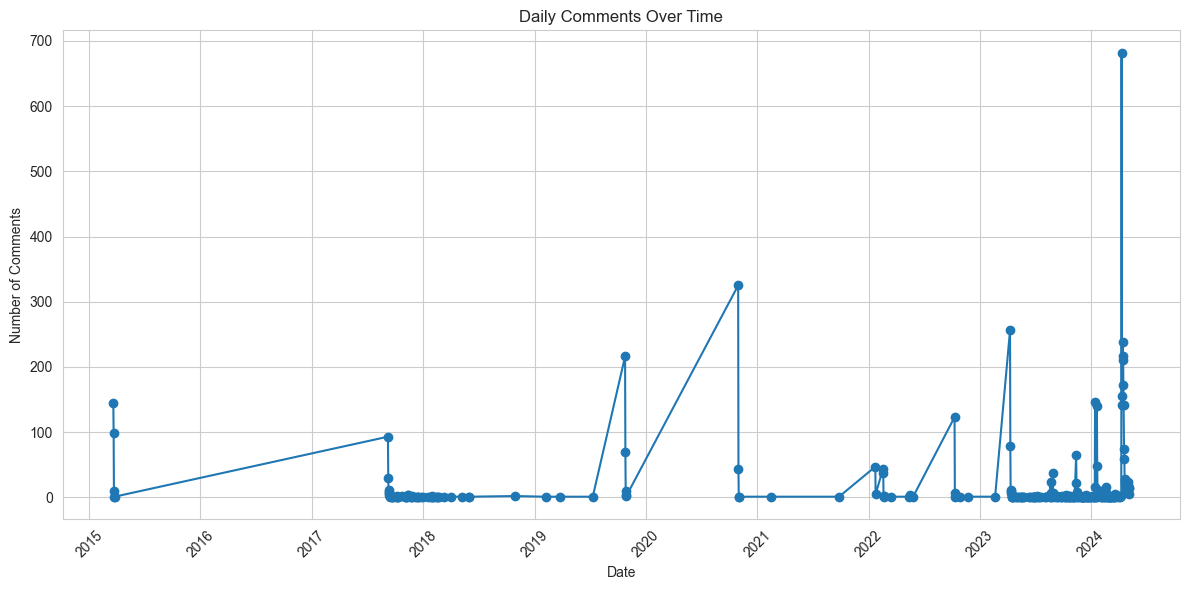

In [91]:
import matplotlib.pyplot as plt

# Create a line plot of the daily comments
plt.figure(figsize=(12, 6))
plt.plot(daily_comments.index, daily_comments.values, marker='o', linestyle='-')
plt.title('Daily Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated date labels
plt.show()


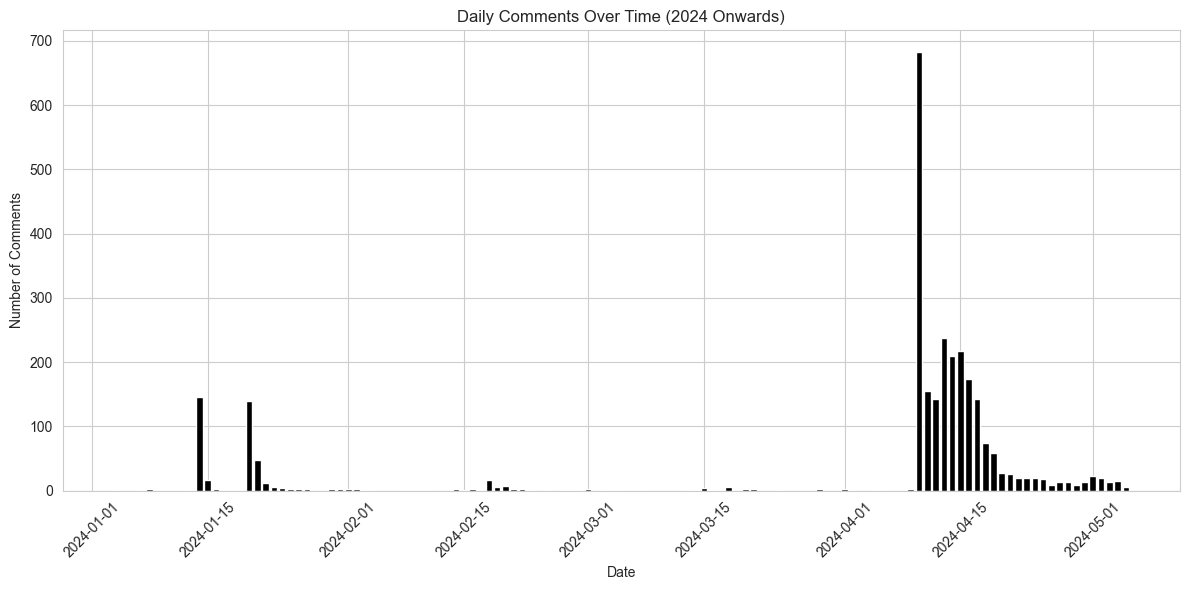

In [85]:
cleaned_df['datetime'] = pd.to_datetime(cleaned_df['datetime'])

# Group by date and count the number of comments per day
daily_comments = cleaned_df.groupby(cleaned_df['datetime'].dt.date).size()

# Filter data from 2023 onwards
filtered_comments = daily_comments[daily_comments.index >= pd.to_datetime('2024-01-01').date()]

plt.figure(figsize=(12, 6))
plt.bar(filtered_comments.index, filtered_comments.values, color='black')
plt.title('Daily Comments Over Time (2024 Onwards)')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated date labels
plt.show()


# Descriptive Statistics

In [17]:
# Descriptive statistics for the 'score' column
(cleaned_df['score'].describe())

count    4903.000000
mean        8.556190
std        62.524891
min       -93.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      1997.000000
Name: score, dtype: float64

# Distribution Visualization

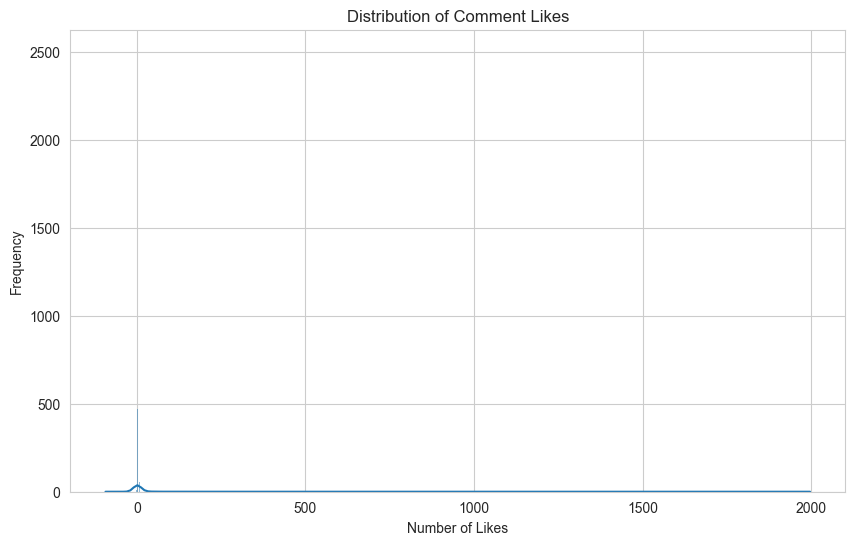

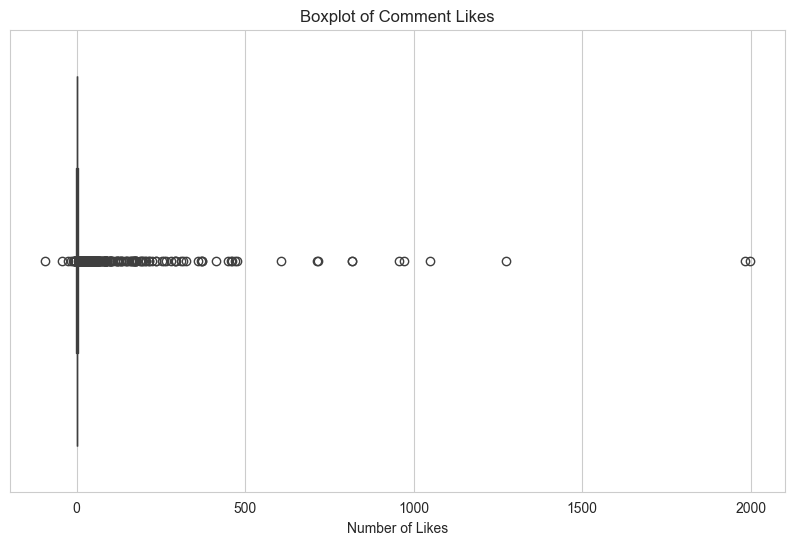

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the scores
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['score'], kde=True)
plt.title('Distribution of Comment Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers and distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_df['score'])
plt.title('Boxplot of Comment Likes')
plt.xlabel('Number of Likes')
plt.show()


# Correlation Analysis

                   score  comment_length
score           1.000000        0.001345
comment_length  0.001345        1.000000


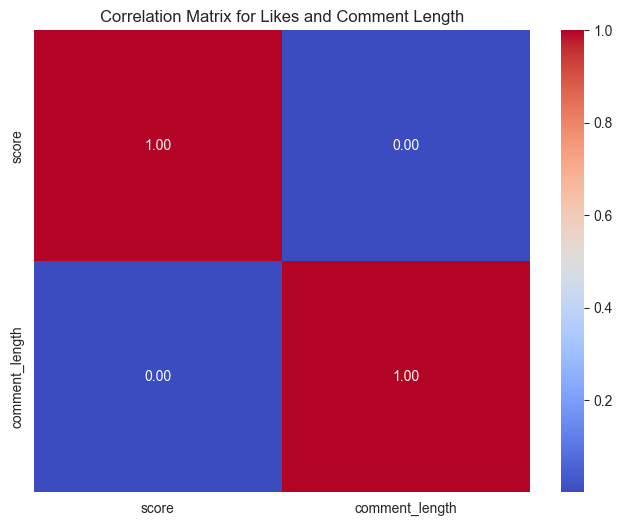

In [19]:
# Add a column for comment length for potential correlation analysis
cleaned_df['comment_length'] = cleaned_df['cleaned_text'].apply(len)

# Compute correlation matrix
correlation_matrix = cleaned_df[['score', 'comment_length']].corr()
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Likes and Comment Length')
plt.show()


# Time Series Analysis of Likes

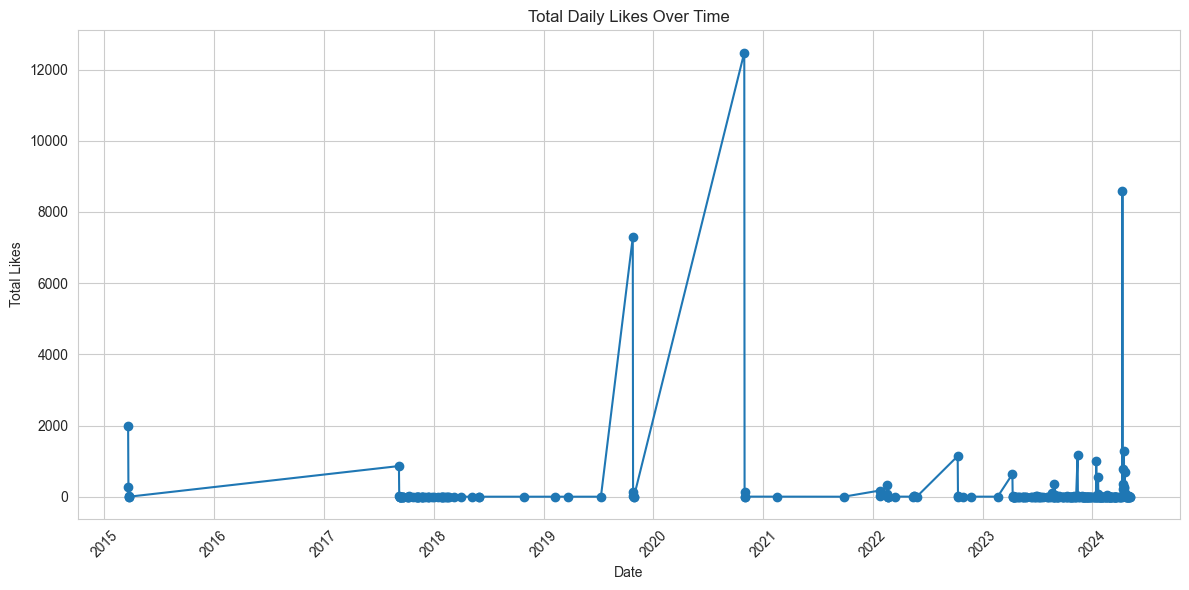

In [20]:
# Group by date and sum the scores
daily_likes = cleaned_df.groupby(cleaned_df['datetime'].dt.date)['score'].sum()

# Plotting daily likes
plt.figure(figsize=(12, 6))
plt.plot(daily_likes.index, daily_likes.values, marker='o', linestyle='-')
plt.title('Total Daily Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Advanced Visualization

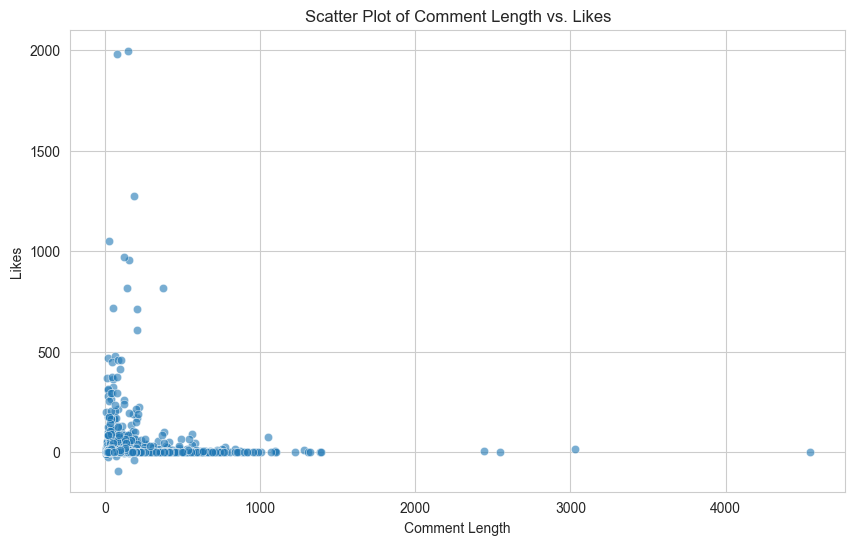

In [21]:
# Scatter plot of comment length vs. likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='comment_length', y='score', alpha=0.6)
plt.title('Scatter Plot of Comment Length vs. Likes')
plt.xlabel('Comment Length')
plt.ylabel('Likes')
plt.show()


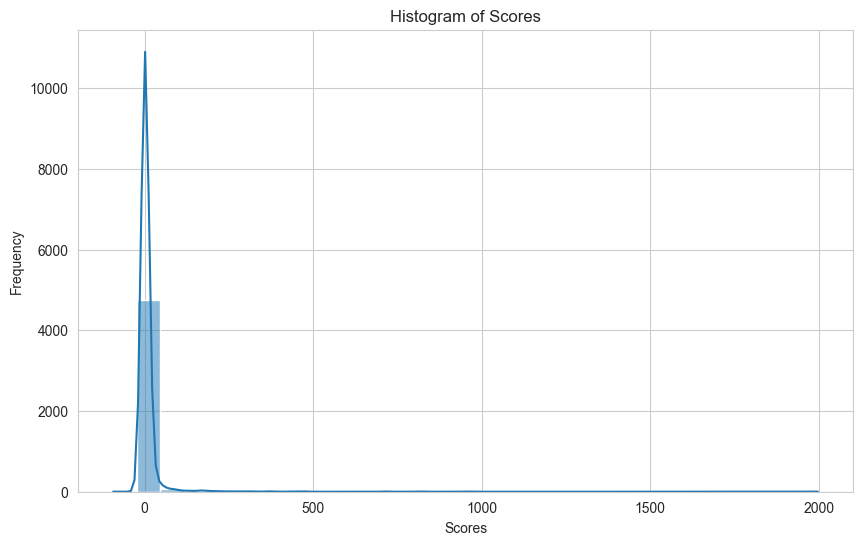

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is named cleaned_df and has a 'score' column
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['score'], bins=30, kde=True)  # Adjust bins as necessary
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()


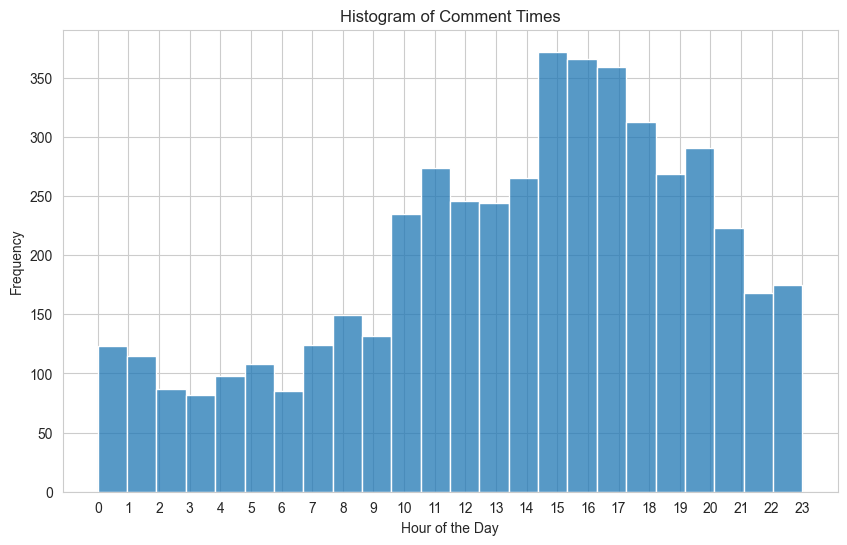

In [23]:
# Extract hour from datetime
cleaned_df['hour'] = cleaned_df['datetime'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['hour'], bins=24, kde=False)  # There are 24 hours in a day
plt.title('Histogram of Comment Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))  # Ensure ticks for every hour
plt.show()


In [24]:
(cleaned_df[['word_count', 'char_count', 'score']].describe())

,word_count,char_count,score
count,4903.000000,4903.000000,4903.000000
mean,19.698960,112.986335,8.556190
std,26.220932,157.070757,62.524891
min,1.000000,3.000000,-93.000000
25%,7.000000,37.000000,0.000000
50%,12.000000,68.000000,0.000000
75%,23.000000,133.000000,2.000000
max,760.000000,4545.000000,1997.000000


In [25]:
(cleaned_df[['word_count', 'char_count', 'score']].corr())

,word_count,char_count,score
word_count,1.000000,0.970882,0.002135
char_count,0.970882,1.000000,0.001345
score,0.002135,0.001345,1.000000


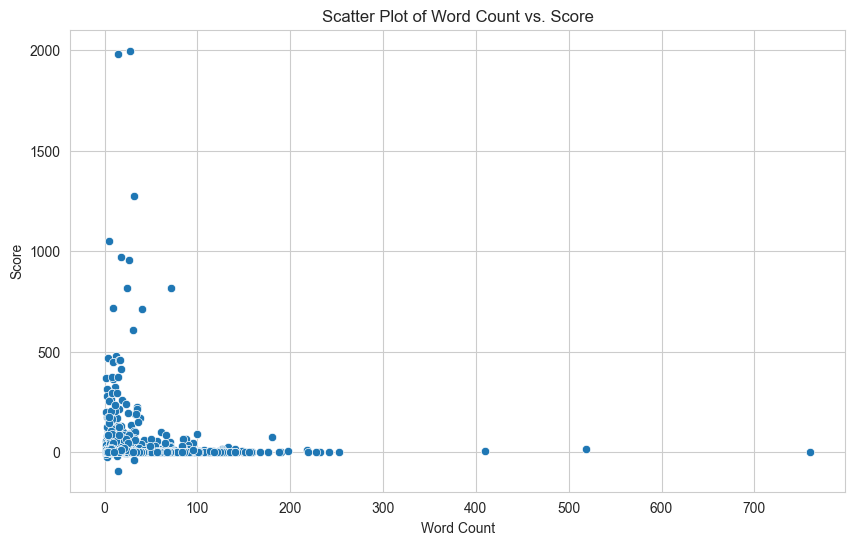

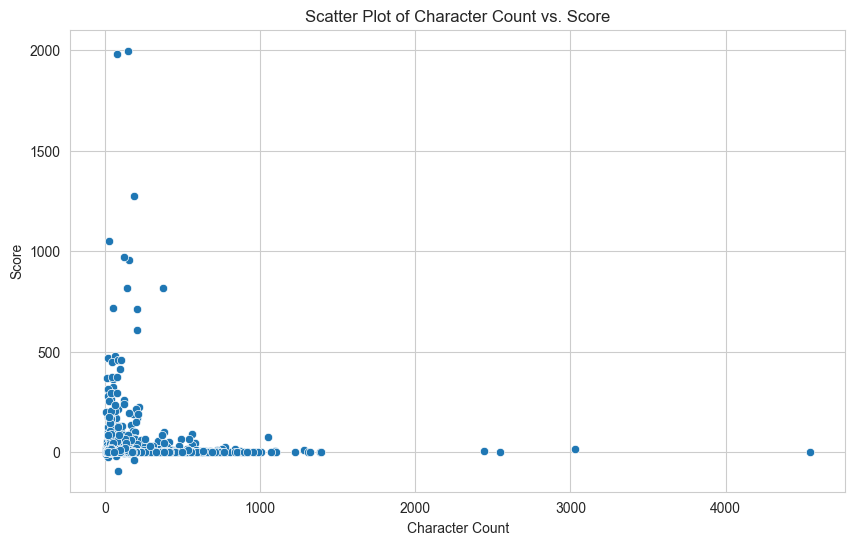

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='word_count', y='score')
plt.title('Scatter Plot of Word Count vs. Score')
plt.xlabel('Word Count')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='char_count', y='score')
plt.title('Scatter Plot of Character Count vs. Score')
plt.xlabel('Character Count')
plt.ylabel('Score')
plt.show()


# User Activity Analysis

In [27]:
# Count comments by each author
author_activity = cleaned_df['author'].value_counts()

# Display the top 10 most active users
(author_activity.head(10))


author
isorfir                 19
ACDRetirementHome       16
Cinema_Colorist         15
michUP33                13
snakeproof              12
Idiot_Savant_Tinker     11
@Locatioman             10
Vandrel                 10
PM_ME_UR_DECOLLETAGE     8
justaguy394              8
Name: count, dtype: int64

# Engagement Analysis

In [28]:
# Aggregate scores by author
author_engagement = cleaned_df.groupby('author')['score'].sum().sort_values(ascending=False)

# Display the top 10 authors by total likes received
(author_engagement.head(10))


author
A_1337_Canadian         2012
@GavClifton             1997
Car-face                1275
@nedialkosimonov3893    1049
@johnwilson8582          972
stortag                  966
Olivineyes               823
wewewawa                 818
Idiot_Savant_Tinker      817
publicbigguns            731
Name: score, dtype: int64

# Sentiment Analysis by Author

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
cleaned_df['sentiment'] = cleaned_df['cleaned_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Average sentiment score by author
author_sentiment = cleaned_df.groupby('author')['sentiment'].mean().sort_values(ascending=False)

# Display the top 10 authors by average sentiment
(author_sentiment.head(10))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/biraa@sphnet.com.sg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


author
@phil_nicholls             0.99610
@RemyRAD                   0.98665
@brianmcintyre14           0.98310
@FishFish1995              0.98210
@Oceans_Sail               0.98190
@rbnhd1144                 0.97640
@jarthurs                  0.97500
@csachevauxsansabri2612    0.97470
@harrygibson1883           0.97410
robertbowerman             0.97410
Name: sentiment, dtype: float64

# Longevity and Retention

In [30]:
# Finding first and last post dates by author
author_first_post = cleaned_df.groupby('author')['datetime'].min()
author_last_post = cleaned_df.groupby('author')['datetime'].max()

# Combining into a DataFrame
author_activity_span = pd.DataFrame({'First Post': author_first_post, 'Last Post': author_last_post})
(author_activity_span.head(10))


,First Post,Last Post
author,,
-ZeroF56,2020-10-30 17:07:22+00:00,2020-10-30 17:33:56+00:00
-ah,2020-10-30 10:52:15+00:00,2020-10-30 10:52:15+00:00
-null,2019-10-25 17:13:39+00:00,2019-10-25 17:13:39+00:00
02bluesuperroo,2022-01-23 19:35:32+00:00,2022-01-23 19:35:32+00:00
03Titanium,2019-10-25 16:26:52+00:00,2019-10-25 16:26:52+00:00
0__CaptainObvious__0,2020-10-31 01:26:43+00:00,2020-10-31 01:26:43+00:00
0intment,2019-10-25 19:48:56+00:00,2019-10-25 19:48:56+00:00
0ldGuy4EVs,2022-10-10 23:44:34+00:00,2022-10-10 23:44:34+00:00
100catactivs,2020-10-30 19:19:41+00:00,2020-10-30 19:19:41+00:00


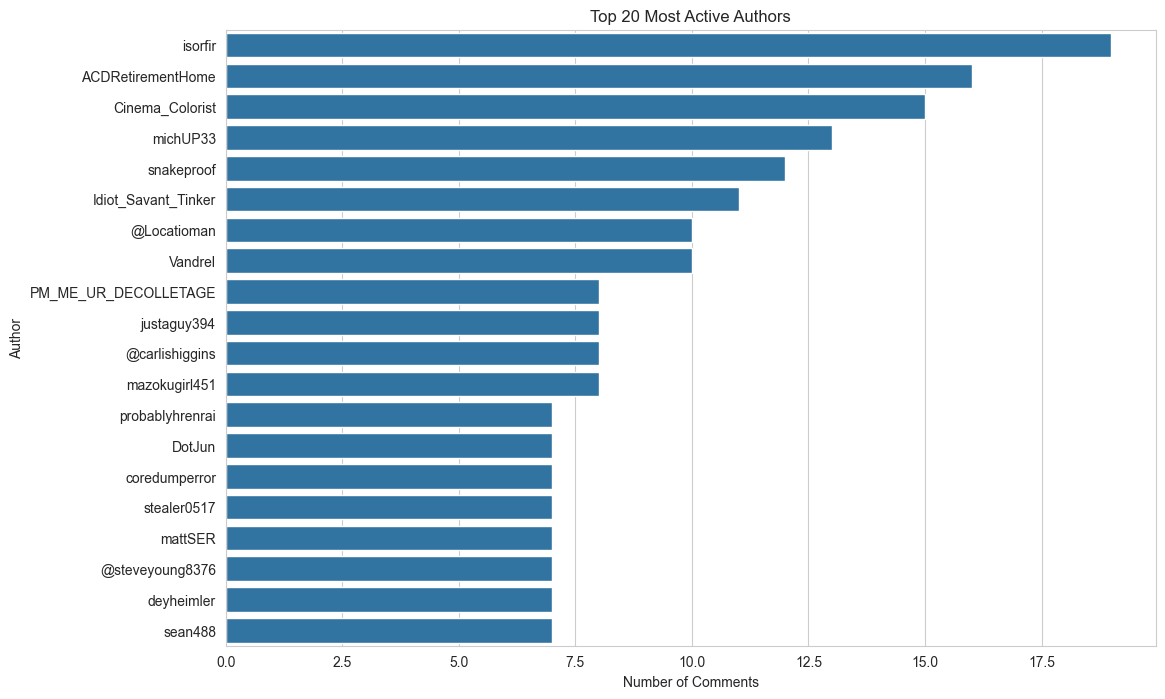

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the top 20 most active authors
plt.figure(figsize=(12, 8))
sns.barplot(x=author_activity.head(20).values, y=author_activity.head(20).index)
plt.title('Top 20 Most Active Authors')
plt.xlabel('Number of Comments')
plt.ylabel('Author')
plt.show()


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Example of applying LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(cleaned_df['cleaned_text'])  # Assuming 'text' is your preprocessed text column
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # Adjust n_components based on expected topics
lda.fit(dtm)    

# To display topics and their top words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
car year mile old like run think diesel fuel engin
Topic 1:
car ev like electr look buy leaf use want make
Topic 2:
charg mile rang drive car leaf use charger trip home
Topic 3:
batteri leaf ev year rang mile nissan car use new
Topic 4:
ev nissan use new buy car peopl video brake make


In [33]:
!pip install scipy==1.10.1


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [51]:
import warnings
warnings.filterwarnings('ignore')

import gensim
import gensim.corpora as corpora

from pprint import pprint

documents = [comment.split() for comment in cleaned_df["cleaned_text"]] #tokenizing_the_words
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 3
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

/Users/biraa@sphnet.com.sg/Work/LABS/WM/SMA/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/biraa@sphnet.com.sg/Work/LABS/WM/SMA/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/biraa@sphnet.com.sg/Work/LABS/WM/SMA/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/biraa@sphnet.com.sg/Work/LABS/WM/SMA/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urll

[(0,
  '0.026*"ev" + 0.018*"car" + 0.017*"rang" + 0.014*"use" + 0.010*"mile" + '
  '0.008*"batteri" + 0.008*"leaf" + 0.008*"buy" + 0.008*"make" + '
  '0.008*"charg"'),
 (1,
  '0.033*"car" + 0.016*"charg" + 0.016*"batteri" + 0.015*"electr" + '
  '0.011*"would" + 0.010*"like" + 0.010*"ev" + 0.009*"use" + 0.008*"year" + '
  '0.008*"get"'),
 (2,
  '0.025*"car" + 0.017*"leaf" + 0.017*"ev" + 0.015*"batteri" + 0.013*"drive" + '
  '0.009*"mile" + 0.009*"k" + 0.009*"charg" + 0.009*"use" + 0.008*"rang"'),
 (3,
  '0.036*"car" + 0.022*"mile" + 0.012*"year" + 0.011*"leaf" + 0.010*"rang" + '
  '0.009*"one" + 0.009*"new" + 0.009*"use" + 0.008*"drive" + 0.007*"get"'),
 (4,
  '0.027*"car" + 0.024*"batteri" + 0.021*"charg" + 0.009*"leaf" + 0.009*"mile" '
  '+ 0.009*"would" + 0.009*"year" + 0.008*"one" + 0.008*"buy" + 0.008*"new"'),
 (5,
  '0.026*"car" + 0.019*"ev" + 0.015*"batteri" + 0.014*"would" + 0.013*"mile" + '
  '0.012*"leaf" + 0.010*"k" + 0.010*"new" + 0.009*"one" + 0.009*"get"'),
 (6,
  '0.020*"

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Assuming 'cleaned_df' is your cleaned DataFrame with a 'cleaned_text' column
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis and directly extract the 'compound' score
cleaned_df['compound'] = cleaned_df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Determine the sentiment type based on the 'compound' score
cleaned_df['vader_sentiment_type'] = cleaned_df['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/biraa@sphnet.com.sg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
cleaned_df[['cleaned_text', 'compound', 'vader_sentiment_type']]

,cleaned_text,compound,vader_sentiment_type
0,sure said nova scotia ampl kw chademo fast cha...,0.9136,positive
1,must use crappi search set see charger look thank,0.3612,positive
2,use chargehub app set filter show chademo,0.0000,neutral
3,app filter adjust find chademo unit said would...,0.0000,neutral
4,regret new nissan leaf regret use correct filt...,-0.4767,negative
...,...,...,...
4939,fastest ever click love work,0.6369,positive
4940,ye boss carwow way,0.0000,neutral
4941,one watch full video yet except editor whoever...,0.0000,neutral
4942,buy ev mistak first place,0.0000,neutral


# Sentiment Analysis

In [39]:
from textblob import TextBlob

# Function to get polarity and subjectivity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply function to the DataFrame
cleaned_df['textblob_polarity'], cleaned_df['textblob_subjectivity'] = zip(*cleaned_df['cleaned_text'].apply(get_sentiment))


In [40]:
cleaned_df[['cleaned_text', 'textblob_polarity', 'textblob_subjectivity']]

,cleaned_text,textblob_polarity,textblob_subjectivity
0,sure said nova scotia ampl kw chademo fast cha...,0.312500,0.517361
1,must use crappi search set see charger look thank,0.000000,0.000000
2,use chargehub app set filter show chademo,0.000000,0.000000
3,app filter adjust find chademo unit said would...,0.000000,0.000000
4,regret new nissan leaf regret use correct filt...,0.136364,0.454545
...,...,...,...
4939,fastest ever click love work,0.500000,0.600000
4940,ye boss carwow way,0.000000,0.000000
4941,one watch full video yet except editor whoever...,0.350000,0.550000
4942,buy ev mistak first place,0.250000,0.333333


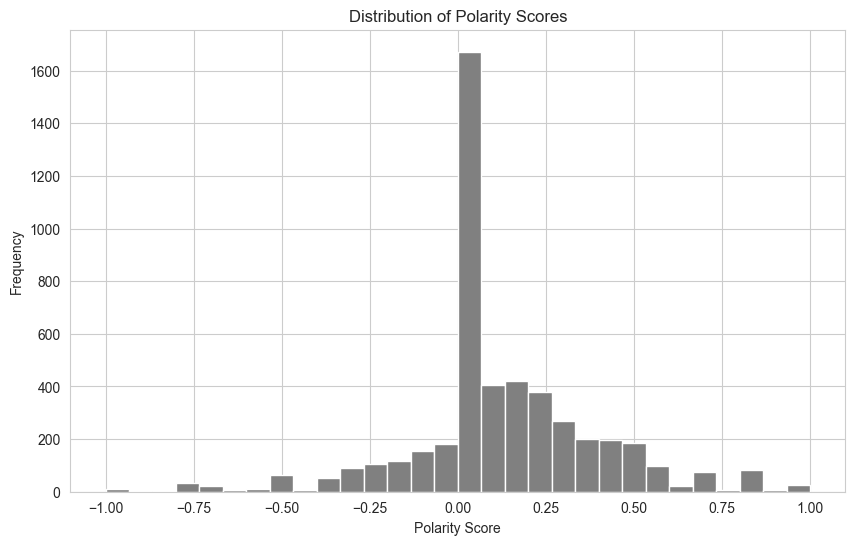

In [57]:
import matplotlib.pyplot as plt

# Assuming 'polarity' is a column in your DataFrame cleaned_df
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['textblob_polarity'], bins=30, color='gray', edgecolor=None)
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


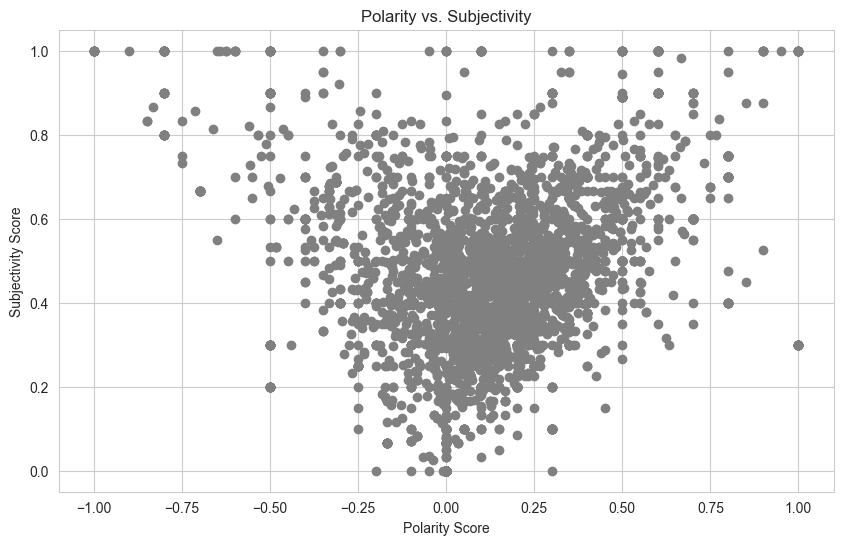

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['textblob_polarity'], cleaned_df['textblob_subjectivity'], color='grey')
plt.title('Polarity vs. Subjectivity')
plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.grid(True)
plt.show()


In [43]:
!python3 -m spacy download en_core_web_sm

/Users/biraa@sphnet.com.sg/Work/LABS/WM/SMA/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [128]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    return [(X.text, X.label_) for X in doc.ents]

# Apply function to the DataFrame
cleaned_df['entities'] = cleaned_df['cleaned_text'].apply(extract_entities)


# Named Entity Recognition (NER)

In [129]:
cleaned_df[['entities']]

,entities
0,"[(nova, ORG), (ampl kw, PERSON), (next year, D..."
1,[]
2,[]
3,"[(two, CARDINAL)]"
4,"[(nissan, ORG), (issu, ORG)]"
...,...
4939,[]
4940,[]
4941,"[(one, CARDINAL)]"
4942,"[(first, ORDINAL)]"


In [141]:
import pprint
cat_entity_counts = {}
for entities in cleaned_df['entities']:
    #pprint.pprint(entities)
    for entity in entities:
        #pprint.pprint(entity)
        if entity[1] not in cat_entity_counts:
            #print(entity[1])
            cat_entity_counts[entity[1]] = 0
        cat_entity_counts[entity[1]] += 1


sumtype_df = pd.DataFrame.from_dict(cat_entity_counts, orient='index', columns=['Count'])
sumtype_df

,Count
ORG,1650
PERSON,1882
DATE,1058
CARDINAL,839
GPE,370
NORP,254
ORDINAL,328
FAC,21
TIME,102
LOC,19


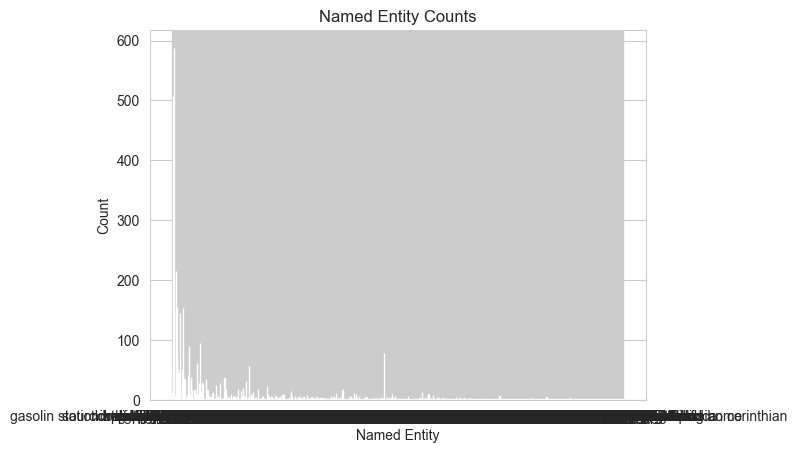

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Code for creating the dataframe and assigning NER tags)

# Create a dictionary to store entity counts
entity_counts = {}
for entities in cleaned_df['entities']:
    for entity in entities:
        if entity[0] not in entity_counts:
            entity_counts[entity[0]] = 0
        entity_counts[entity[0]] += 1

# Create a summary dataframe
summary_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['Count'])
summary_df = summary_df.sort_values(by='Count', ascending=False)  # Sort by count (descending)

# Plot the bar chart
plt.bar(entity_counts.keys(), entity_counts.values())
plt.xlabel("Named Entity")
plt.ylabel("Count")
plt.title("Named Entity Counts")

# Display the summary table next to the chart
plt.axis('tight')  # Adjust layout to accommodate table
#print(summary_df.to_string())  # Print the summary table

plt.show()


In [132]:
summary_df

,Count
one,588
nissan,508
year,215
replac,154
second,154
...,...
tekna kw tekna kw charg chademo point,1
appar lot tesla usa youk fail,1
hubnut,1
nightmar simpli,1


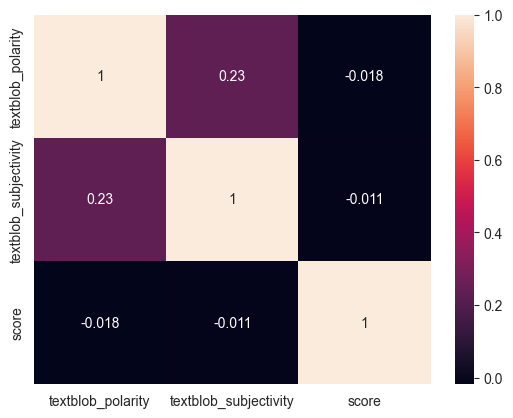

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
correlation_matrix = cleaned_df[['textblob_polarity', 'textblob_subjectivity', 'score']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


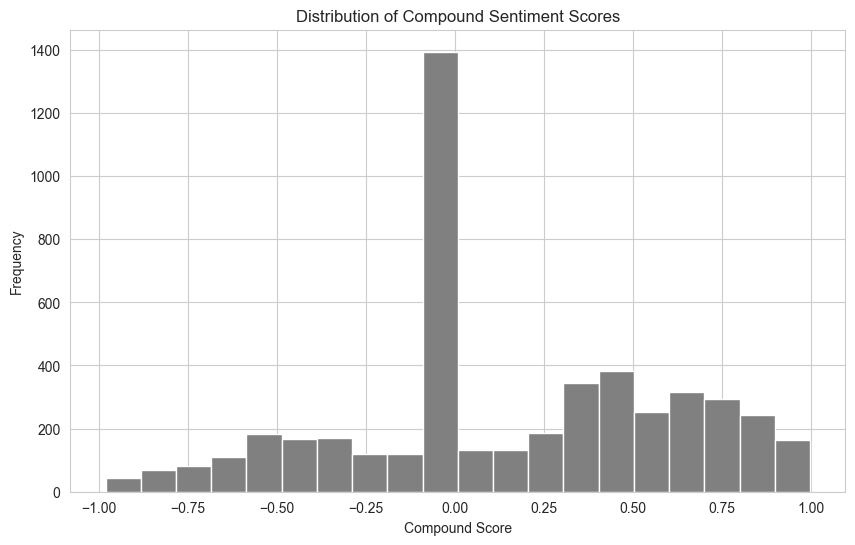

In [53]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(cleaned_df['compound'], bins=20, color='grey', edgecolor=None)  # Plot histogram
plt.title('Distribution of Compound Sentiment Scores')  # Add a title
plt.xlabel('Compound Score')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Optional: add grid lines
plt.show()  # Display the plot


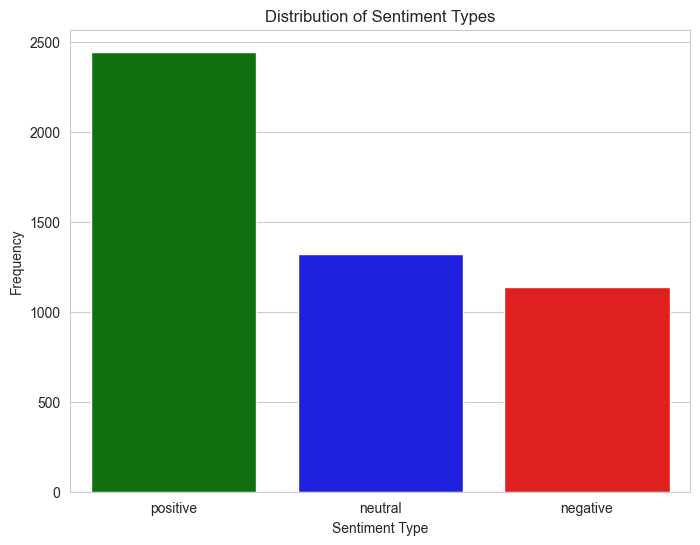

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x=cleaned_df['vader_sentiment_type'], order=['positive', 'neutral', 'negative'], palette=['green', 'blue', 'red'])
plt.title('Distribution of Sentiment Types')
plt.xlabel('Sentiment Type')
plt.ylabel('Frequency')
plt.show()


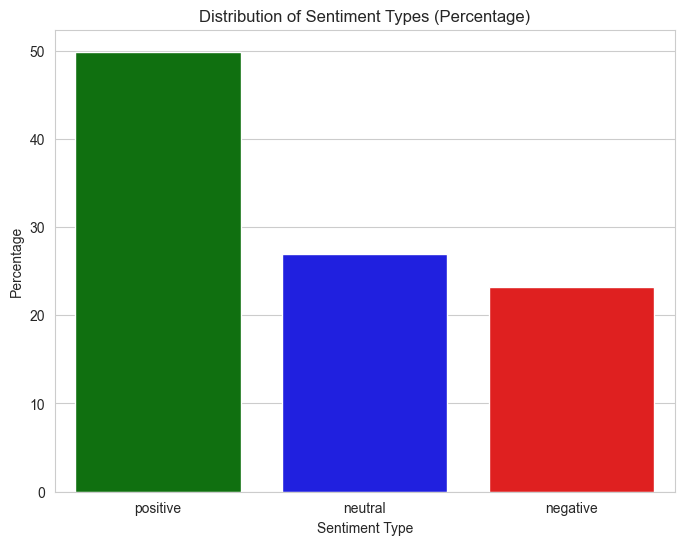

In [77]:
# Reset index to convert to DataFrame suitable for Seaborn
# Calculate the percentage of each sentiment type
sentiment_counts = cleaned_df['vader_sentiment_type'].value_counts(normalize=True) * 100


sentiment_percentages = sentiment_counts.reset_index()
sentiment_percentages.columns = ['vader_sentiment_type', 'percentage']

# Plotting the percentages
plt.figure(figsize=(8, 6))
sns.barplot(x='vader_sentiment_type', y='percentage', data=sentiment_percentages, order=['positive', 'neutral', 'negative'], palette=['green', 'blue', 'red'])
plt.title('Distribution of Sentiment Types (Percentage)')
plt.xlabel('Sentiment Type')
plt.ylabel('Percentage')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Sample data loading and preparation
texts = cleaned_df['cleaned_text'].tolist()  # Convert preprocessed texts to a list
labels = cleaned_df['vader_sentiment_type'].tolist()  # Convert sentiment labels to a list

# Split data into training and test sets
texts_train, texts_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
model.score(X_test, y_test)


0.8093781855249745

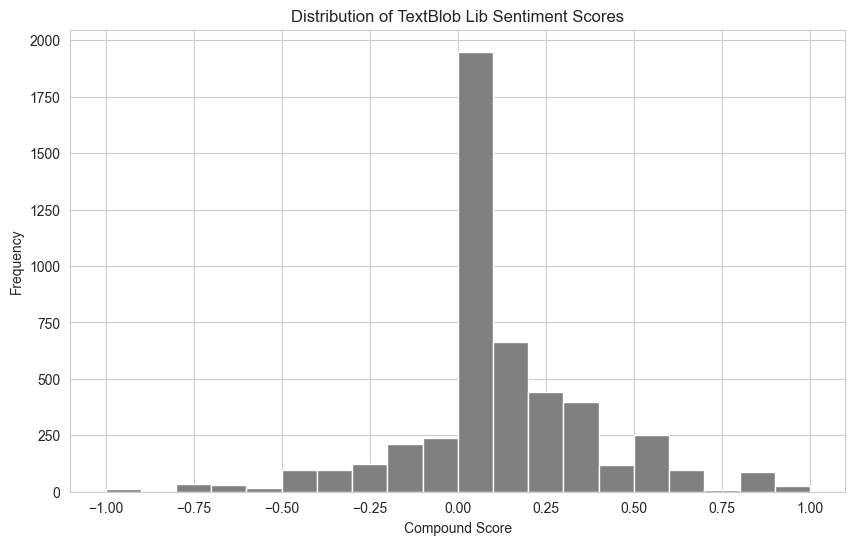

In [56]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(cleaned_df['textblob_polarity'], bins=20, color='grey', edgecolor=None)  # Plot histogram
plt.title('Distribution of TextBlob Lib Sentiment Scores')  # Add a title
plt.xlabel('Compound Score')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Optional: add grid lines
plt.show()  # Display the plot


In [59]:
df_lex = pd.read_csv("./data/2000.tsv", sep="\t", header=None)
df_lex.columns=["word","sentiment", "std.dev"]

In [63]:
mapping = {}
for row in df_lex[["word", "sentiment"]].to_dict("records"):
    mapping[row["word"]] = row["sentiment"]

In [71]:
def sentiment_score(row):
    text = row["text"].lower()
    score = 0
    n = 0
    for word in text.split():
        if word in mapping:
            n += 1
            score += mapping[word]
    if n > 0:
        return score / n
    return 0

cleaned_df["simple_sentiment"] = cleaned_df.apply(sentiment_score, axis=1)

In [73]:
cleaned_df[['text', 'simple_sentiment']]

,text,simple_sentiment
0,You sure about that ? You said you are in Nova...,0.394667
1,I must have been using a crappy search setting...,-0.008333
2,"Use the Chargehub app, and set your filter to ...",0.146667
3,"Some apps have filters, so you have to adjust ...",0.050000
4,So do you regret the new Nissan Leaf? Or do yo...,-0.051667
...,...,...
4939,The fastest i have ever clicked! Love the work!,-0.290000
4940,Yes boss… carwow all the way!!!!,0.920000
4941,Now one has watched the full video yet except ...,0.132500
4942,Buying an EV is a mistake in the first place.,-0.840000


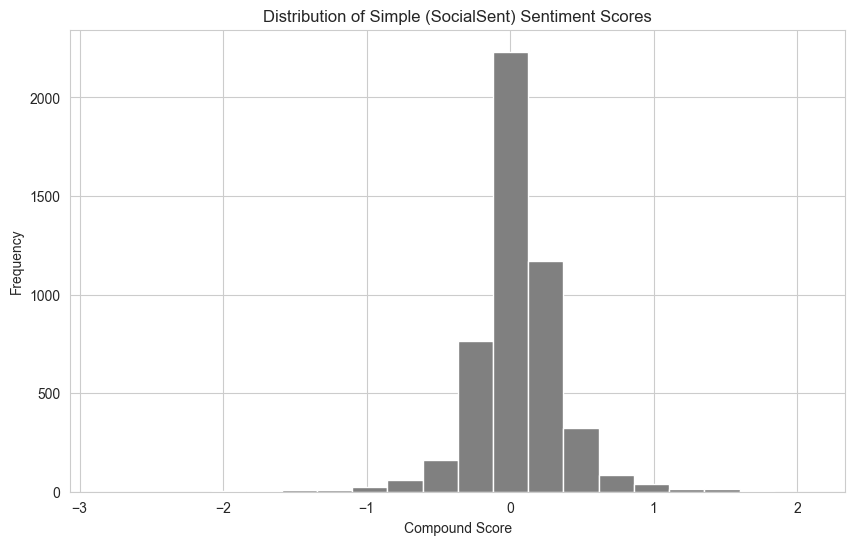

In [75]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(cleaned_df['simple_sentiment'], bins=20, color='grey', edgecolor=None)  # Plot histogram
plt.title('Distribution of Simple (SocialSent) Sentiment Scores')  # Add a title
plt.xlabel('Compound Score')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Optional: add grid lines
plt.show()  # Display the plot

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/biraa@sphnet.com.sg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


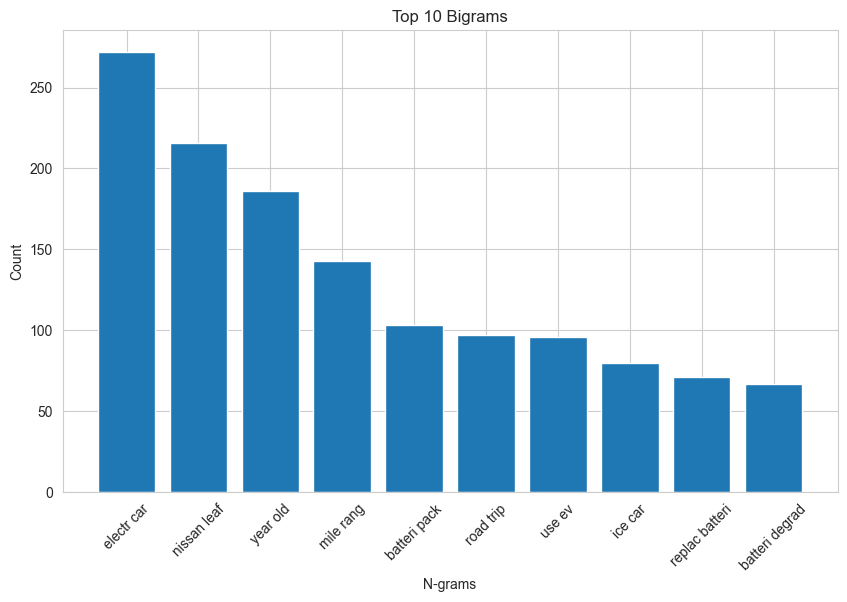

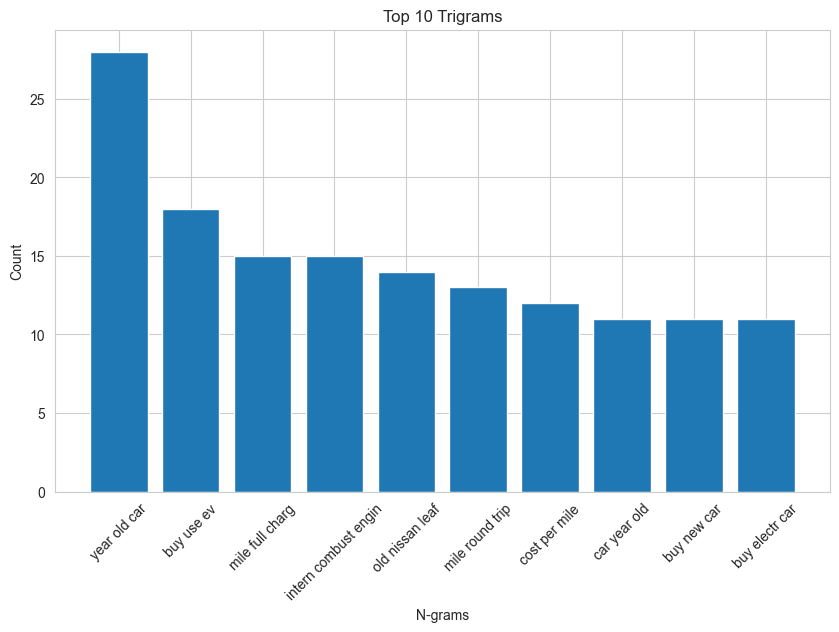

In [145]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')  # Download the necessary NLTK data

# Function to extract and plot n-grams
def plot_ngrams(corpus, ngram_range=(2, 2), top_n=10, title='Bigrams'):
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)

    # Sum up the counts of each n-gram
    ngram_counts = X.toarray().sum(axis=0)
    ngram_features = vectorizer.get_feature_names_out()

    # Create a DataFrame with n-gram counts
    ngram_df = pd.DataFrame({'ngram': ngram_features, 'count': ngram_counts})
    ngram_df = ngram_df.sort_values(by='count', ascending=False).head(top_n)

    # Plot the n-grams
    plt.figure(figsize=(10, 6))
    plt.bar(ngram_df['ngram'], ngram_df['count'])
    plt.title(f'Top {top_n} {title}')
    plt.xlabel('N-grams')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Extract and plot bigrams
plot_ngrams(cleaned_df['cleaned_text'], ngram_range=(2, 2), top_n=10, title='Bigrams')

# Extract and plot trigrams
plot_ngrams(cleaned_df['cleaned_text'], ngram_range=(3, 3), top_n=10, title='Trigrams')
